<a href="https://colab.research.google.com/github/sayansen2003/sayansen2003/blob/main/Housing%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
#!pip install tensorflow_decision_forests # Install the missing module
import tensorflow_decision_forests as tfdf # Now this import should work
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [8]:
from IPython.display import display, HTML

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Display the first few rows of train_data in a table
train_table_html = train_data.head().to_html()

# Display the first few rows of test_data in a table
test_table_html = test_data.head().to_html()

# Display the tables side by side
display(HTML("<h3>Train Data</h3>"))
display(HTML(train_table_html))

display(HTML("<h3>Test Data</h3>"))
display(HTML(test_table_html))

Train data shape: (1460, 81)
Test data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
test_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [12]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-13-82a0a68effc2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice']);


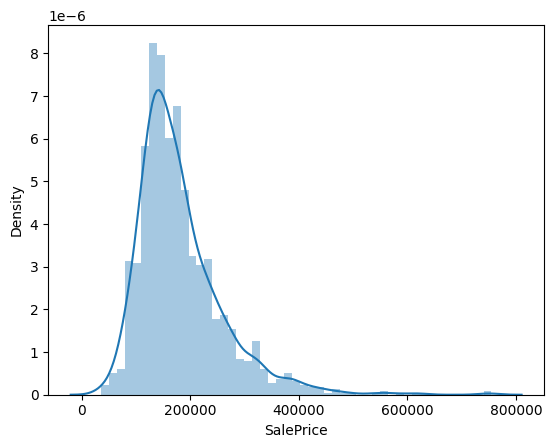

In [13]:
sns.distplot(train_data['SalePrice']);

In [14]:
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


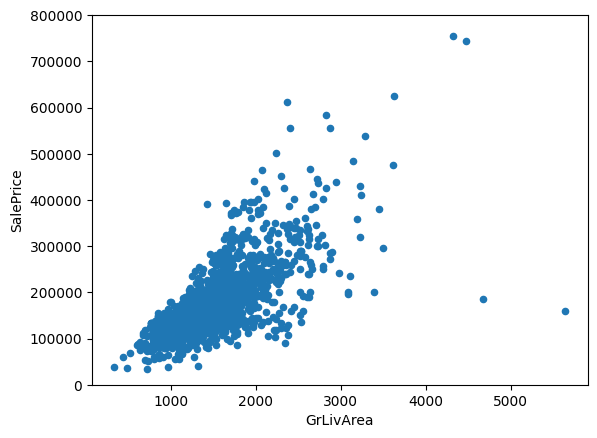

In [15]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

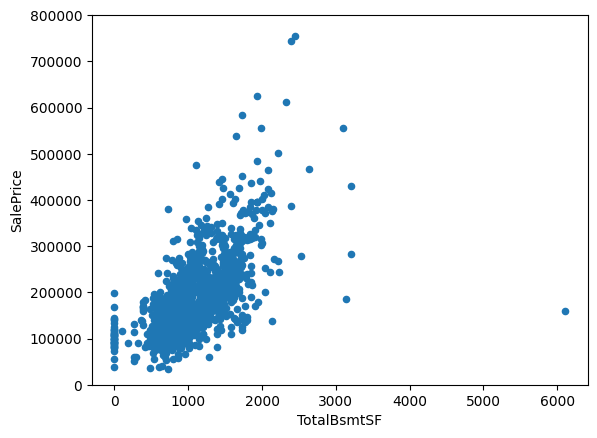

In [16]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

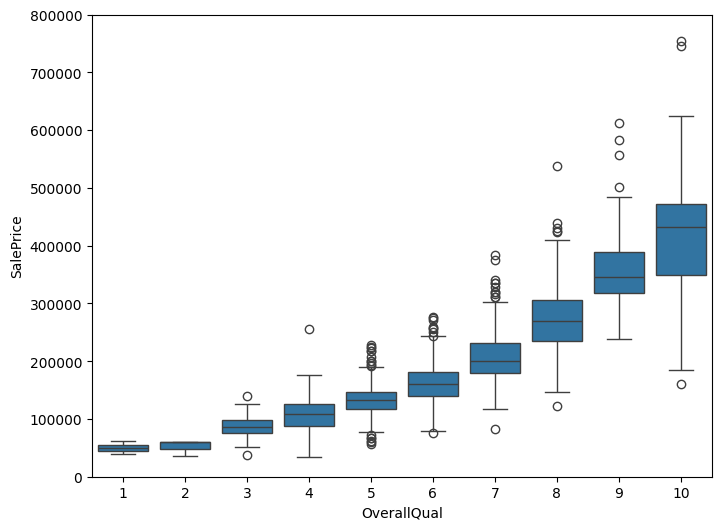

In [17]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

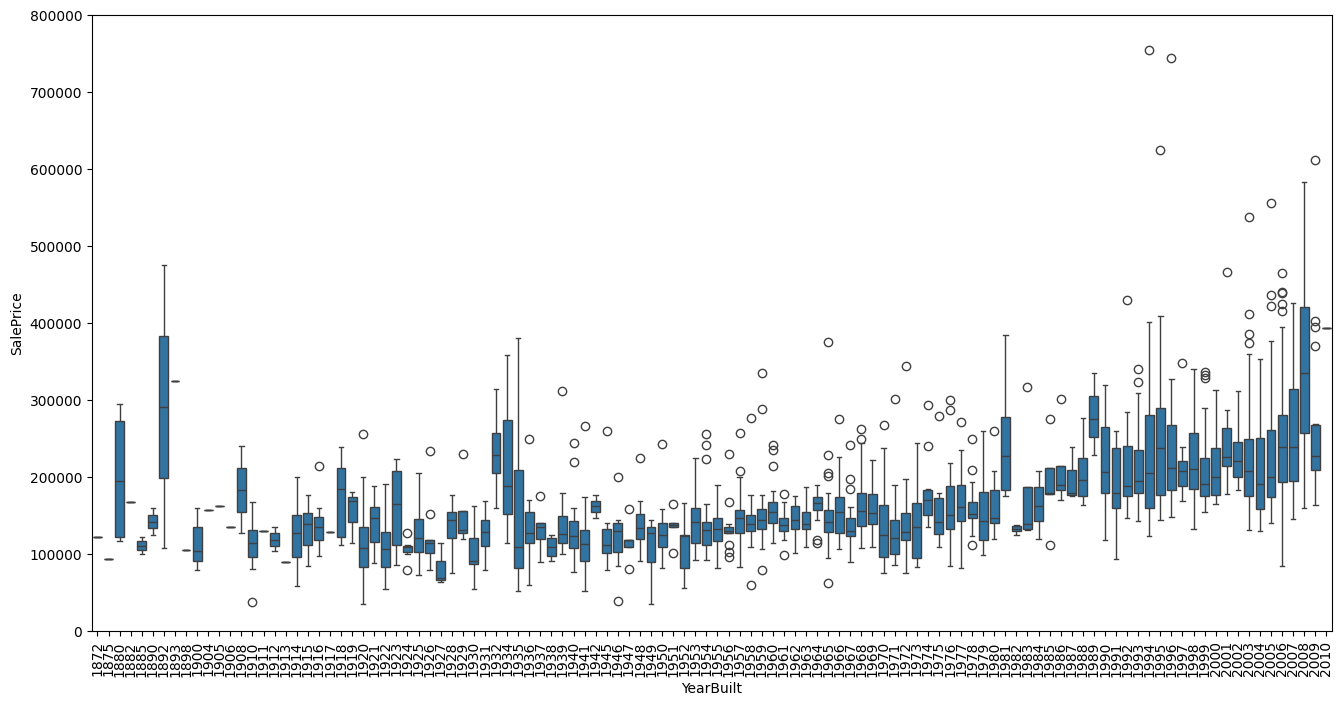

In [18]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [19]:
import pandas as pd
import plotly.graph_objects as go

# Check if 'SalePrice' column exists
if 'SalePrice' not in train_data.columns:
    raise ValueError("'SalePrice' column is missing in the dataset")

# Select numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Encode categorical variables (one-hot encoding)
encoded_categorical_cols = pd.get_dummies(train_data[categorical_cols])

# Concatenate numerical and encoded categorical columns
encoded_data = pd.concat([train_data[numerical_cols], encoded_categorical_cols], axis=1)

# Calculate correlation matrix
corr_matrix = encoded_data.corr().abs()

# Select top 10 most correlated features
target = 'SalePrice'
top_corr_features = corr_matrix[target].sort_values(ascending=False).head(21).index.tolist()

# Filter correlation matrix to include only top features
filtered_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

# Create annotated heatmap using Plotly's Heatmap trace
fig = go.Figure(data=go.Heatmap(
    z=filtered_corr_matrix.values,
    x=top_corr_features,
    y=top_corr_features,
    colorscale='RdYlGn',
    colorbar=dict(title='Correlation'),
    hoverongaps=False
))

fig.update_layout(
    title='Top 20 Most Correlated Features with SalePrice Heatmap',
    title_x=0.5,
    xaxis=dict(tickangle=45, automargin=True),
    yaxis=dict(tickangle=0, automargin=True),
    width=800,
    height=800,
    font=dict(size=12)
)

# Add hover information (correlation values)
hover_text = []
for i in range(len(top_corr_features)):
    row = []
    for j in range(len(top_corr_features)):
        row.append(f'Correlation: {filtered_corr_matrix.values[i][j]:.2f}<br>{top_corr_features[i]} vs {top_corr_features[j]}')
    hover_text.append(row)

fig.update_traces(hoverinfo='text', text=hover_text, hovertemplate='%{text}')

fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



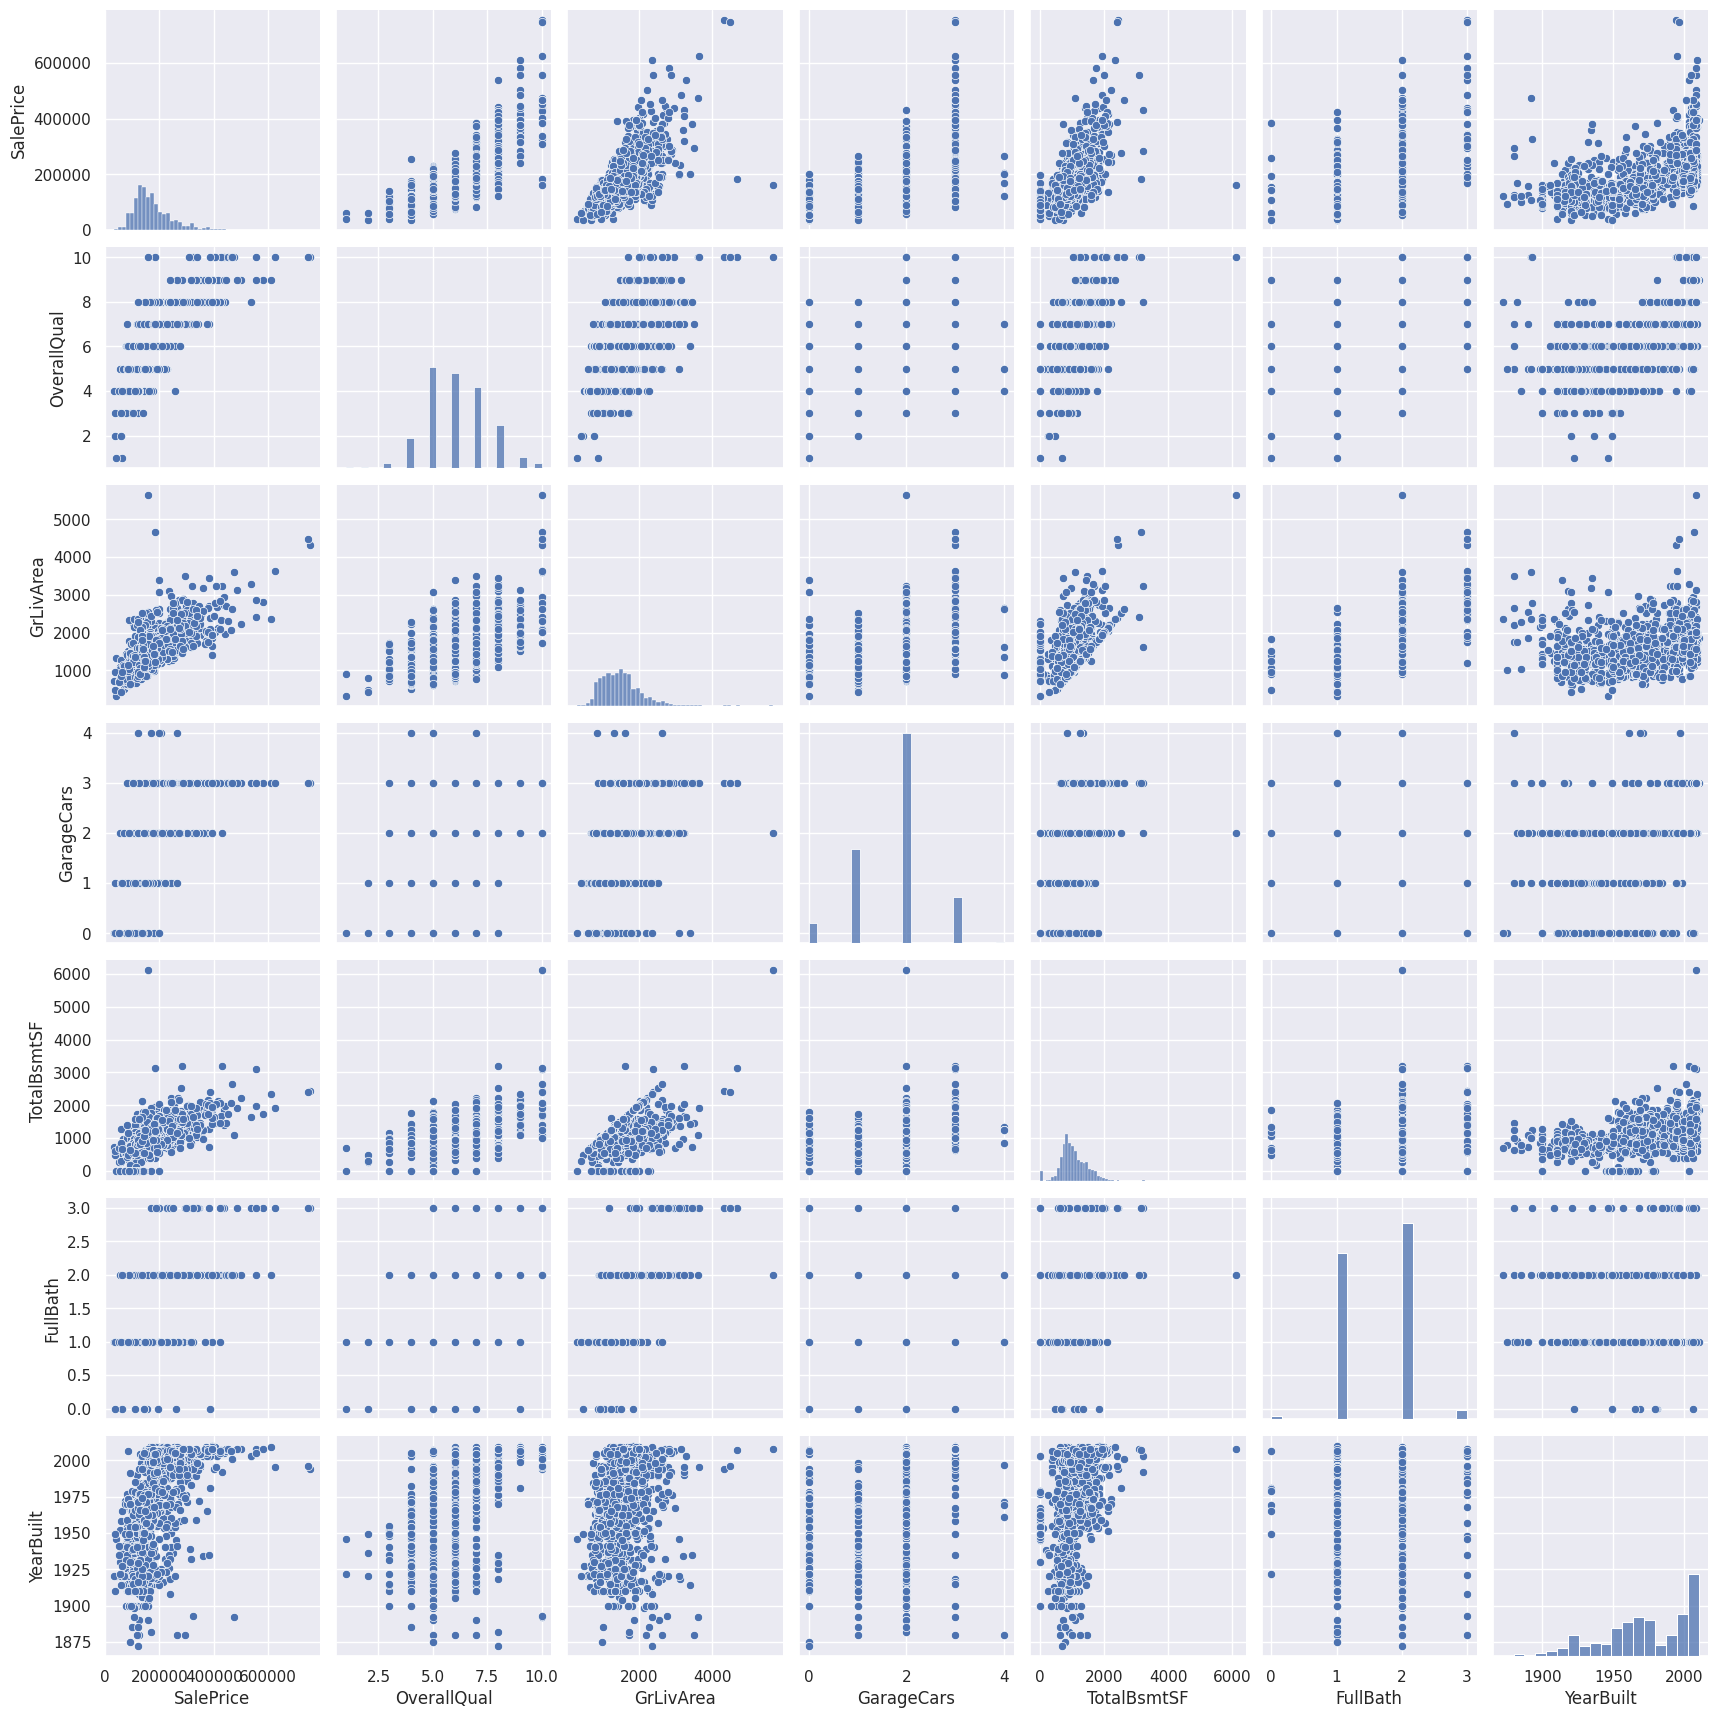

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

In [21]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [22]:
missing_data = train_data.isnull().sum()

# Drop all columns with missing data except 'Electrical'
cols_to_drop = missing_data[missing_data > 0].index.difference(['Electrical'])
train_data = train_data.drop(columns=cols_to_drop)

# Drop rows where 'Electrical' has missing data
train_data = train_data.dropna(subset=['Electrical'])

train_data.isnull().sum().max()

0

In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardizing data
saleprice_scaled = StandardScaler().fit_transform(np.array(train_data['SalePrice']).reshape(-1, 1));
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

print('Outer range (low) of the distribution:')
print(low_range)
print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


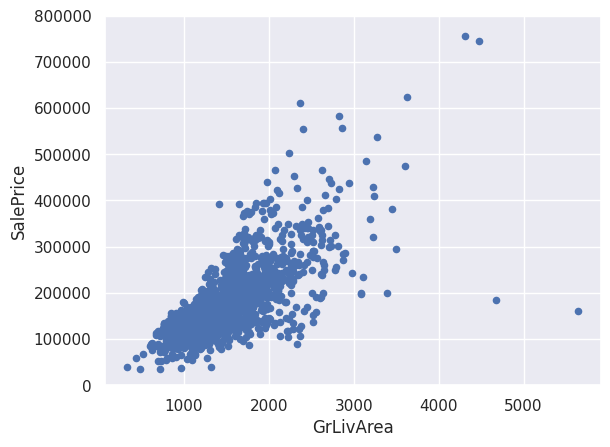

In [24]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [25]:
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

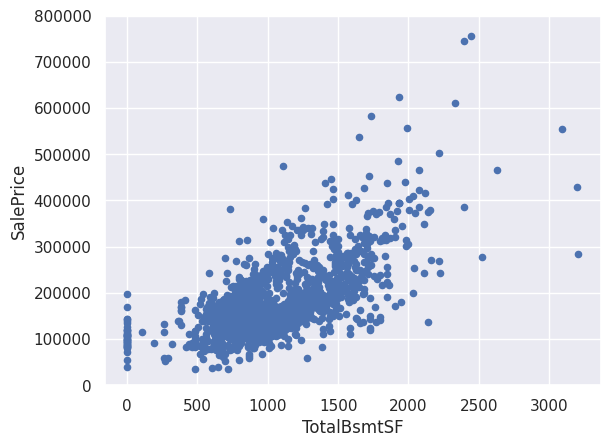

In [26]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [27]:
var = 'GrLivArea'
filtered_data = train_data[train_data[var] <= 3000]
data = pd.concat([filtered_data['SalePrice'], filtered_data[var]], axis=1)

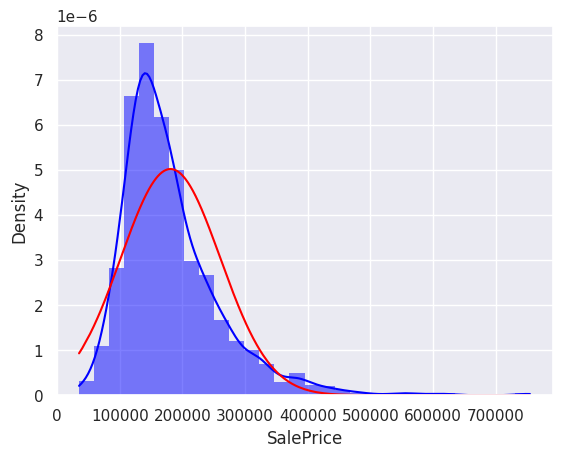

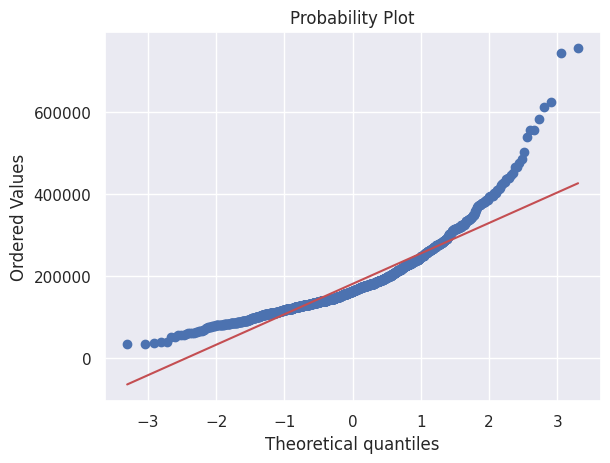

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

# Histogram and normal probability plot
sns.histplot(train_data['SalePrice'], kde=True, stat="density", linewidth=0, element='step', bins=30, color='blue')
sns.lineplot(x=sorted(train_data['SalePrice']), y=norm.pdf(sorted(train_data['SalePrice']), loc=train_data['SalePrice'].mean(), scale=train_data['SalePrice'].std()), color='red')

fig = plt.figure()
res = probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [30]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])

<ipython-input-31-952633857741>:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.



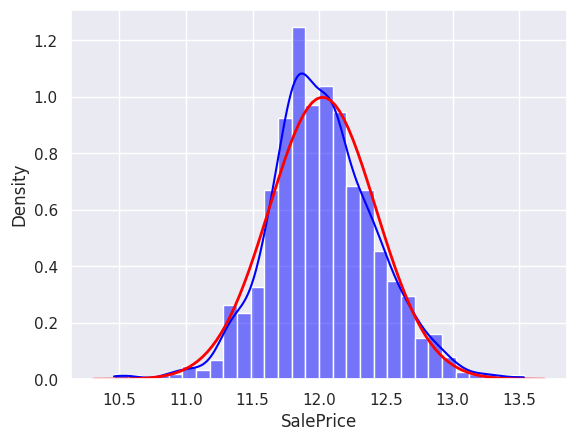

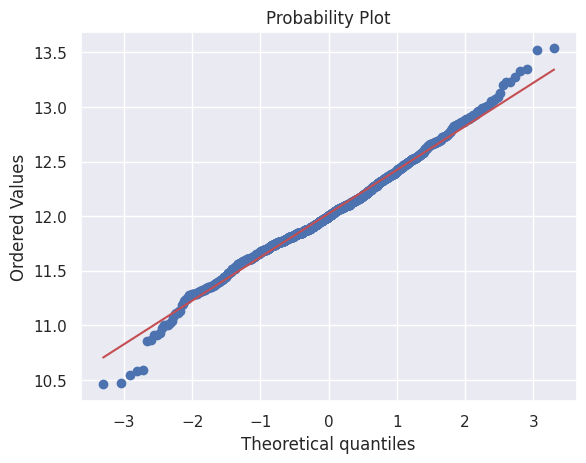

In [31]:
sns.histplot(train_data['SalePrice'], kde=True, stat="density", bins=30, color='blue')
mean, std = norm.fit(train_data['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, color='red')

fig = plt.figure()
res = probplot(train_data['SalePrice'], plot=plt)
plt.show()

<ipython-input-32-26869fe566a6>:12: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.



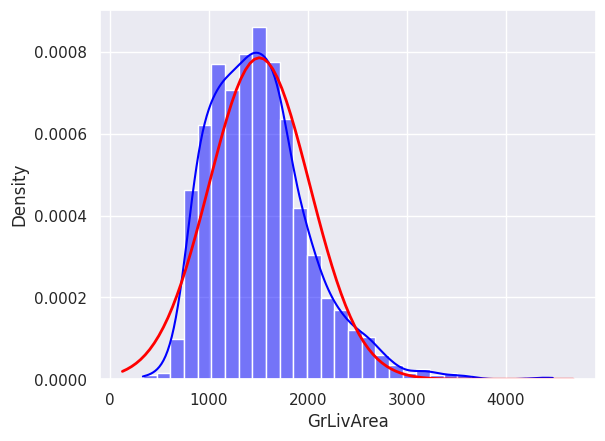

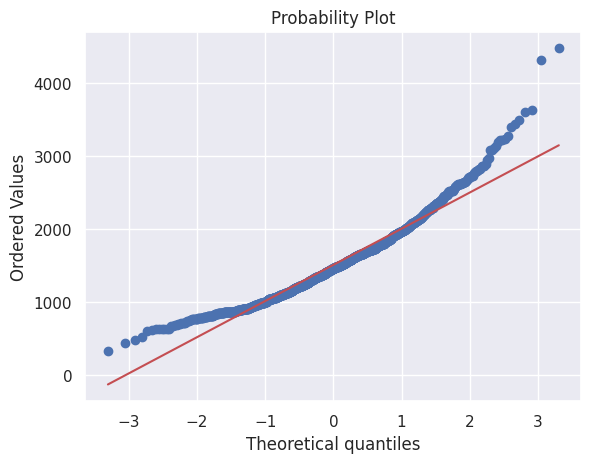

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import numpy as np

# Histogram and normal probability plot
sns.histplot(train_data['GrLivArea'], kde=True, stat="density", bins=30, color='blue')
mean, std = norm.fit(train_data['GrLivArea'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, color='red')

fig = plt.figure()
res = probplot(train_data['GrLivArea'], plot=plt)
plt.show()

In [33]:
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

<ipython-input-34-26869fe566a6>:12: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.



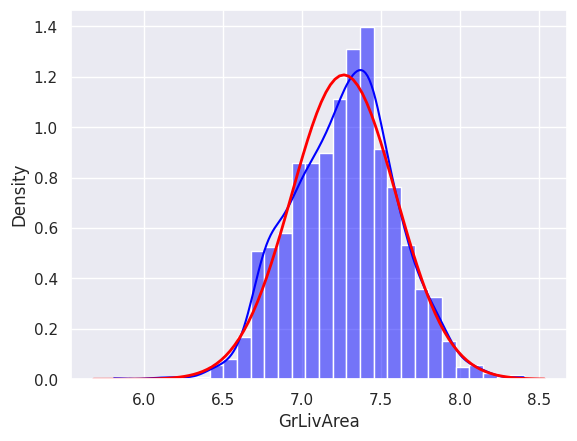

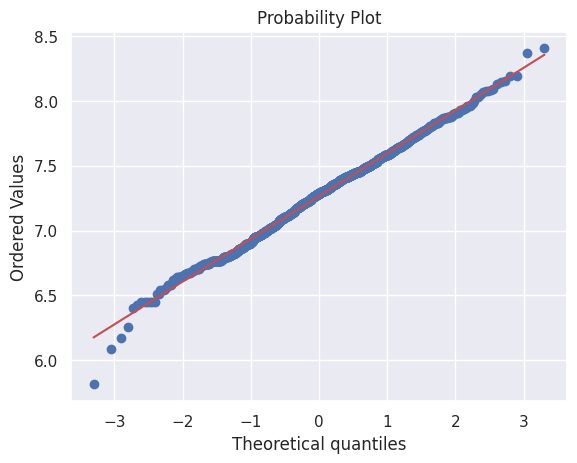

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import numpy as np

# Histogram and normal probability plot
sns.histplot(train_data['GrLivArea'], kde=True, stat="density", bins=30, color='blue')
mean, std = norm.fit(train_data['GrLivArea'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, color='red')

fig = plt.figure()
res = probplot(train_data['GrLivArea'], plot=plt)
plt.show()

<ipython-input-35-61be2d49d373>:12: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.



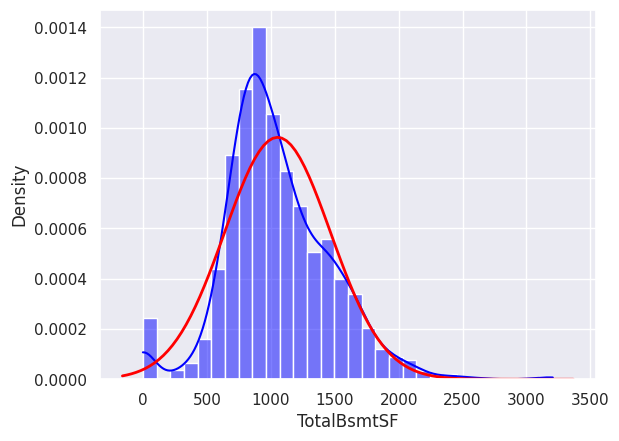

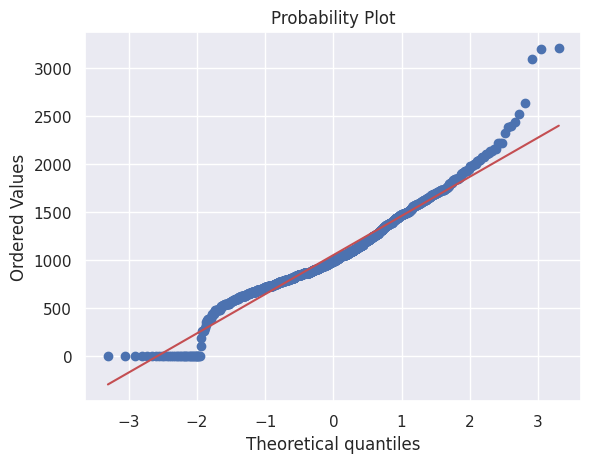

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import numpy as np

# Histogram and normal probability plot
sns.histplot(train_data['TotalBsmtSF'], kde=True, stat="density", bins=30, color='blue')
mean, std = norm.fit(train_data['TotalBsmtSF'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, color='red')

fig = plt.figure()
res = probplot(train_data['TotalBsmtSF'], plot=plt)
plt.show()

In [36]:
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [37]:
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



<ipython-input-38-521447ddaa61>:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.



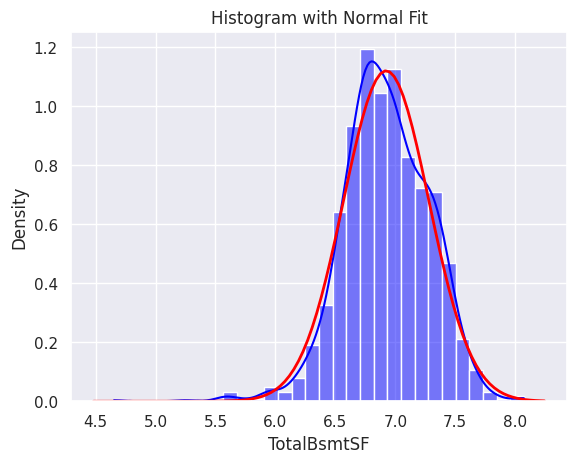

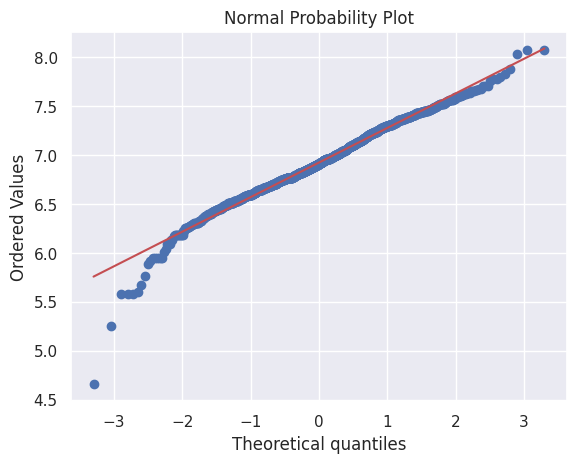

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import numpy as np

# Filtering out the zero values in 'TotalBsmtSF'
filtered_data = train_data[train_data['TotalBsmtSF'] > 0]['TotalBsmtSF']

# Histogram and normal probability plot
sns.histplot(filtered_data, kde=True, stat="density", bins=30, color='blue')
mean, std = norm.fit(filtered_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, color='red')
plt.title('Histogram with Normal Fit')

fig = plt.figure()
res = probplot(filtered_data, plot=plt)
plt.title('Normal Probability Plot')
plt.show()

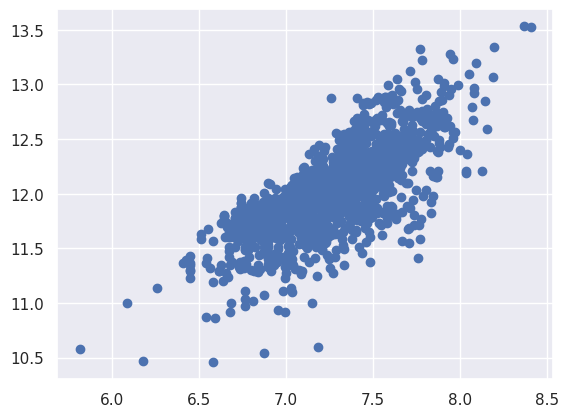

In [39]:
plt.scatter(train_data['GrLivArea'], train_data['SalePrice']);

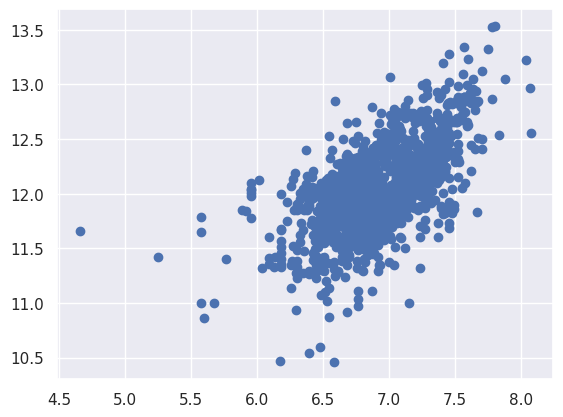

In [40]:
plt.scatter(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], train_data[train_data['TotalBsmtSF']>0]['SalePrice']);

In [41]:
train_data = pd.get_dummies(train_data)

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [43]:
train.drop(train[(train['GrLivArea'] >4000) & (train['SalePrice']<300000)].index,inplace = True)

In [44]:
full = pd.concat([train,test],ignore_index=True)
full.drop('Id',axis = 1,inplace = True)
full.shape

(2917, 80)

In [45]:
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

In [46]:
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        46.900000   43.0    20
Blueste        27.300000   24.0    10
BrDale         21.500000   21.0    30
BrkSide        55.789474   51.0    95
ClearCr        88.150000   80.5    20
CollgCr        71.336364   70.0   220
Crawfor        69.951807   70.0    83
Edwards        65.153409   64.5   176
Gilbert        74.207207   64.0   111
IDOTRR         62.241379   60.0    87
MeadowV        25.606061   21.0    33
Mitchel        75.144444   74.0    90
NAmes          75.210667   73.0   375
NPkVill        28.142857   24.0    21
NWAmes         81.517647   80.0    85
NoRidge        91.629630   89.0    54
NridgHt        84.184049   92.0   163
OldTown        61.777293   60.0   229
SWISU          59.068182   60.0    44
Sawyer         74.551020   72.0    98
SawyerW        70.669811   67.0   106
Somerst        64.549383   72.5   162
StoneBr        62.173913   60.0    46
Timber         81.157895   82.0    57
Veenker        72.000000   80.0    16

In [47]:
full['LotAreaCut'] = pd.qcut(full.LotArea,10)

full.groupby([full['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4921.8]    35.741036   34.0   251
(4921.8, 7007.2]      55.460674   52.0   267
(7007.2, 7949.0]      62.959839   62.0   249
(7949.0, 8740.4]      67.113725   65.0   255
(8740.4, 9452.0]      69.959184   70.0   245
(9452.0, 10148.8]     73.988235   75.0   255
(10148.8, 11000.0]    73.636364   75.0   253
(11000.0, 12196.8]    83.371681   82.0   226
(12196.8, 14285.8]    84.973684   85.0   228
(14285.8, 215245.0]   92.846535   90.0   202

In [48]:
full['LotFrontage']= full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
full['LotFrontage']= full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



In [49]:
missing_values = full.isnull().sum()

missing_values[missing_values>0].sort_values(ascending = False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
KitchenQual        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [50]:
columns = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in columns:full[col].fillna(0,inplace= True)

In [51]:
columns1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
"GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col1 in columns1:full[col1].fillna('None',inplace = True)

In [52]:
columns2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional",
            "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]

for col2 in columns2:
    full[col2].fillna(full[col2].mode()[0],inplace = True)

In [53]:
full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1459
dtype: int64

In [54]:
numeric_features = full.select_dtypes(include=[np.number])
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [55]:
Numstr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold",
          "YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]

for i in Numstr:
    full[i]=full[i].astype(str)

In [56]:
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                     mean    median count
MSSubClass                               
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          240403.542088  216000.0   297
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52

In [57]:
def map_values():
    full["oMSSubClass"] = full.MSSubClass.map({'180':1,
                                        '30':2, '45':2,
                                        '190':3, '50':3, '90':3,
                                        '85':4, '40':4, '160':4,
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})

    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

    full["oCondition1"] = full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})

    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})

    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1,
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2,
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})

    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})

    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

    full["oFoundation"] = full.Foundation.map({'Slab':1,
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})

    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})

    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})

    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})

    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})

    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})

    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})

    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})

    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})

    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})




    return "Done!"

In [58]:
map_values()

'Done!'

In [59]:
full.drop("LotAreaCut",axis=1,inplace=True)

full.drop(['SalePrice'],axis=1,inplace=True)

In [60]:
full[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0


In [61]:
from sklearn.base import BaseEstimator,TransformerMixin

class labenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YearBuilt']=label.fit_transform(X['YearBuilt'])
        X['YearRemodAdd']=label.fit_transform(X['YearRemodAdd'])
        X['GarageYrBlt']=label.fit_transform(X['GarageYrBlt'])
        return X

In [62]:
class skewness(BaseEstimator,TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        return X

In [63]:
class dummies(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X = pd.get_dummies(X)
        return X

In [64]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('labenc',labenc()),('skewness',skewness(skew =1)),('dummies',dummies())])

In [65]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

full_copy = full.copy()
data_pipeline = pipeline.fit_transform(full_copy)

In [66]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

In [67]:
n_train = train.shape[0]
n_train

1458

In [68]:
X= data_pipeline[:n_train]
y = train.SalePrice
test_X = data_pipeline[n_train:]
X.shape,y.shape,test_X.shape

((1458, 405), (1458,), (1459, 405))

In [69]:
X_scaled = robust_scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = robust_scaler.transform(test_X)

In [70]:
X_scaled.shape,y_log.shape,test_X.shape

((1458, 405), (1458,), (1459, 405))

In [71]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]

            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]


            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]


            return X

In [72]:
pipeline = Pipeline([('labenc',labenc()),('add_feature', add_feature(additional=2)),
                     ('skewness',skewness(skew =1)),('dummies',dummies())])

full_pipe = pipeline.fit_transform(full)
full_pipe.shape

(2917, 426)

In [73]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = robust_scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = robust_scaler.transform(test_X)

In [74]:
print(X_scaled.shape)

(1458, 426)


In [75]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

models = [LinearRegression(),
             Ridge(),
             Lasso(alpha=0.01,max_iter=10000),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             SVR(),
             LinearSVR(),
             ElasticNet(alpha = 0.001,max_iter=10000),
             SGDRegressor(max_iter=1000, tol = 1e-3),
             BayesianRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ExtraTreesRegressor(),
             XGBRegressor()
             ]

In [77]:
names = ['LR','Ridge','Lasso','RF','GBR','SVR','LSVR','ENet','SGDR','BayRidge','Kernel','XTreeR','XGBR']

In [79]:
from sklearn.model_selection import cross_val_score

for model,name in zip(models,names):
    score = rmse_cv(model,X_scaled,y_log)
    print("{}: {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR: 2362226781.982901, 4250360616.544543
Ridge: 0.117596, 0.009054
Lasso: 0.120932, 0.005813
RF: 0.131767, 0.007568
GBR: 0.121423, 0.004538
SVR: 0.131747, 0.010868


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LSVR: 0.123899, 0.010364
ENet: 0.108729, 0.005422
SGDR: 0.294587, 0.012175
BayRidge: 0.110576, 0.005997
Kernel: 0.109421, 0.005545
XTreeR: 0.125086, 0.008232
XGBR: 0.132300, 0.004476


In [80]:
from sklearn.base import RegressorMixin

# To define the average weight
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,model,weight):
        self.model = model
        self.weight = weight

    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.model]
        for model in self.models_:
            model.fit(X,y)
        return self

    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [81]:
lasso = Lasso(alpha= 0.0005, max_iter= 10000)
ridge = Ridge(alpha=45, max_iter= 10000)
svr = SVR(C = 0.2, epsilon= 0.025, gamma = 0.0004, kernel = 'rbf')
ker = KernelRidge(alpha=0.15 ,kernel='polynomial',degree=3 , coef0=0.9)
ela = ElasticNet(alpha=0.0065,l1_ratio=0.075,max_iter=10000)
bay = BayesianRidge()

In [83]:
from sklearn.base import clone

# Assign weights to all the above 6 models
w1 = 0.047
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.003
w6 = 0.2

weight_avg = AverageWeight(model = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.1092439889607518


In [84]:
weight_avg = AverageWeight(model = [svr,ker],weight=[0.50,0.50])
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.11166439558199082


In [85]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, mod, meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)

    def fit(self, X, y):
        self.saved_model = [[] for _ in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))

        for i, model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X, y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index, i] = renew_model.predict(X[val_index])

        self.meta_model.fit(oof_train, y)
        return self

    def predict(self, X):
        whole_test = np.column_stack([np.column_stack([model.predict(X) for model in single_model]).mean(axis=1)
                                      for single_model in self.saved_model])
        return self.meta_model.predict(whole_test)

    def get_oof(self, X, y, test_X):
        oof = np.zeros((X.shape[0], len(self.mod)))
        test_single = np.zeros((test_X.shape[0], 5))
        test_mean = np.zeros((test_X.shape[0], len(self.mod)))
        for i, model in enumerate(self.mod):
            for j, (train_index, val_index) in enumerate(self.kf.split(X, y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index], y[train_index])
                oof[val_index, i] = clone_model.predict(X[val_index])
                test_single[:, j] = clone_model.predict(test_X)
            test_mean[:, i] = test_single.mean(axis=1)
        return oof, test_mean

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.base import clone
from sklearn.model_selection import KFold
import numpy as np
from sklearn.impute import SimpleImputer

X_scaled_imputed = SimpleImputer().fit_transform(X_scaled)
y_log_imputed = SimpleImputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

# Initialize stacking model
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)
score = rmse_cv(stack_model,X_scaled_imputed,y_log_imputed)
print(score.mean())

0.10770367887911969


In [87]:
from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

In [89]:
x_val=pd.DataFrame(X_val)
x_test=pd.DataFrame(X_test)

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
val_pred1=model1.predict(X_val)
test_pred1=model1.predict(X_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
val_pred2=model2.predict(X_val)
test_pred2=model2.predict(X_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [91]:
from sklearn.linear_model import LogisticRegression

df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9166666666666666

In [92]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# define dataset
X,y = load_wine().data,load_wine().target

In [93]:
from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [94]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(random_state=1)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test, y_test)

0.9551681195516812

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(learning_rate=0.01, random_state=1)
grad_boost.fit(X_train, y_train)
grad_boost.score(X_test,y_test)

0.8232444832809329

In [96]:
import xgboost as xgb
from xgboost import XGBRegressor


xgb_boost = XGBRegressor(random_state=1, learning_rate=0.01)
xgb_boost.fit(X_train, y_train)
xgb_boost.score(X_test,y_test)

0.8296449797740642

In [97]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

# Define RMSE scorer (root mean squared error)
scorer = make_scorer(mean_squared_error, squared=False)

eclf = VotingRegressor(estimators=[
    ('Ada Boost', ada_boost),
    ('Grad Boost', grad_boost),
    ('XG Boost', xgb_boost)],
    weights=[1,1,1])

# List of regressors
regressors = [ada_boost, grad_boost, xgb_boost, eclf]

# Loop through regressors and evaluate using RMSE
for reg, label in zip(regressors, ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']):
    scores = cross_val_score(reg, X, y, cv=10, scoring=scorer)
    print("RMSE: %0.2f (+/- %0.2f) [%s]" % (-scores.mean(), scores.std(), label))

RMSE: -0.20 (+/- 0.18) [Ada Boost]
RMSE: -0.37 (+/- 0.19) [Grad Boost]
RMSE: -0.36 (+/- 0.21) [XG Boost]
RMSE: -0.29 (+/- 0.16) [Ensemble]


In [98]:
eclf.fit(X_train, y_train)

# Evaluate using cross-validation and RMSE
scores = cross_val_score(eclf, X, y, cv=10, scoring=scorer)
print("RMSE: %0.2f (+/- %0.2f) [%s]" % (-scores.mean(), scores.std(), 'Ensemble'))

RMSE: -0.29 (+/- 0.16) [Ensemble]


In [99]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [100]:
from sklearn.ensemble import VotingRegressor
import numpy as np

class CustomVotingRegressor(VotingRegressor):
    def __init__(self, estimators, weights):
        super().__init__(estimators, weights)

    def predict(self, X):
        # Assuming self.saved_model and self.meta_model are defined appropriately
        whole_test = np.column_stack([np.column_stack([model.predict(X) for model in single_model]).mean(axis=1)
                                      for single_model in self.saved_model])
        return self.meta_model.predict(whole_test)

In [101]:
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error

# Load the test dataset
test_data = pd.read_csv("test.csv")

# Extract the Id column from the test dataset
test_ID = test_data['Id']

# Assuming X_train, X_test, y_log are defined and preprocessed

# Convert numpy arrays to pandas DataFrames or Series
X_train_df = pd.DataFrame(X_train)
y_log_series = pd.Series(y_log)

# Check initial shapes
print("Initial X_train shape:", X_train_df.shape)
print("Initial y_train shape:", y_log_series.shape)

# Ensure X_train and y_log have the same number of samples
if X_train_df.shape[0] != y_log_series.shape[0]:
    print(f"Mismatch in number of samples: X_train {X_train_df.shape[0]}, y_log {y_log_series.shape[0]}")
    # Handle mismatch, e.g., by aligning indices
    common_indices = X_train_df.index.intersection(y_log_series.index)
    X_train_df = X_train_df.loc[common_indices]
    y_log_series = y_log_series.loc[common_indices]
    print("Aligned X_train shape:", X_train_df.shape)
    print("Aligned y_train shape:", y_log_series.shape)

# Assuming you used the following preprocessing for X_train:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Fit the imputer and scaler on the training data
X_train_imputed = imputer.fit_transform(X_train_df)
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Apply the same preprocessing to X_test
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)


lasso = Lasso(alpha= 0.0005, max_iter= 10000)
ridge = Ridge(alpha=45, max_iter= 10000)
svr = SVR(C = 0.2, epsilon= 0.025, gamma = 0.0004, kernel = 'rbf')
ker = KernelRidge(alpha=0.15 ,kernel='polynomial',degree=3 , coef0=0.9)
ela = ElasticNet(alpha=0.0065,l1_ratio=0.075,max_iter=10000)
bay = BayesianRidge()


from sklearn.base import clone

# Assign weights to all the above 6 models
w1 = 0.047
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.003
w6 = 0.2

weight_avg = AverageWeight(model = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

# Create the stacking model
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

# Fit the stacking model
stack_model.fit(X_train_scaled, y_log_series)

# Predictions from stacking model
stack_pred_log = stack_model.predict(X_test_scaled)

# Inverse transform the stacking predictions
stack_pred = np.expm1(stack_pred_log)

# Bagging VotingRegressor with only ExtraTreesRegressor
et = ExtraTreesRegressor()

# Create VotingRegressor
bagging_regressor = VotingRegressor(estimators=[('Extra Trees', et)])

# Fit bagging model
bagging_regressor.fit(X_train_scaled, y_log_series)

# Predictions from bagging model
bagging_pred_log = bagging_regressor.predict(X_test_scaled)

# Inverse transform the bagging predictions
bagging_pred = np.expm1(bagging_pred_log)

# Boosting AdaBoostRegressor
ada_boost = AdaBoostRegressor()

# Fit boosting model
ada_boost.fit(X_train_scaled, y_log_series)

# Predictions from boosting model
boosting_pred_log = ada_boost.predict(X_test_scaled)

# Inverse transform the boosting predictions
boosting_pred = np.expm1(boosting_pred_log)

# Calculate ensemble prediction from all models
ensemble_pred = (stack_pred * 0.75 +
                 bagging_pred * 0.15 +
                 boosting_pred * 0.15)

# Verify alignment between test_ID and ensemble_pred
print("Shape of X_test:", X_test.shape)
print("Length of ensemble_pred:", len(ensemble_pred))
print("Length of test_ID:", len(test_ID))

# Ensure 'test_ID' is correctly assigned to 'sub' DataFrame
sub = pd.DataFrame()
sub['Id'] = test_ID[:len(ensemble_pred)]  # Use only the IDs corresponding to predictions
sub['SalePrice'] = ensemble_pred

# Save submission file
sub.to_csv('submission.csv', index=False)

# Read the CSV file into a DataFrame
submission = pd.read_csv('submission.csv')

# Display the first few rows of the DataFrame
print(submission.head())

# Display summary statistics or more details
print(submission.describe())
print(submission.info())

Initial X_train shape: (142, 13)
Initial y_train shape: (1458,)
Mismatch in number of samples: X_train 142, y_log 1458
Aligned X_train shape: (142, 13)
Aligned y_train shape: (142,)
Shape of X_test: (36, 13)
Length of ensemble_pred: 36
Length of test_ID: 1459
     Id      SalePrice
0  1461  180440.525433
1  1462  171355.005178
2  1463  185196.598360
3  1464  145017.250047
4  1465  188275.216140
                Id      SalePrice
count    36.000000      36.000000
mean   1478.500000  173845.152875
std      10.535654   14177.011366
min    1461.000000  131322.305887
25%    1469.750000  169593.226650
50%    1478.500000  176271.838836
75%    1487.250000  184737.608416
max    1496.000000  191941.556642
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         36 non-null     int64  
 1   SalePrice  36 non-null     float64
dtypes: float64(1), int64(1)
memor